# Import and Load Data

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
import seaborn as sns 
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm
from scipy.special import softmax
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import plotly.graph_objects as grp
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import tensorflow as tf
import keras
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from scipy import optimize
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

In [16]:
#https://archive.ics.uci.edu/ml/datasets/Room+Occupancy+Estimation
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00640/Occupancy_Estimation.csv"
df = pd.read_csv(url)
df = pd.DataFrame(df) 
df.drop(columns=['Date'], inplace=True)
numerical_cols = ['S1_temp','S2_temp','S3_temp','S4_temp','S1_Light','S2_Light','S3_Light','S4_Light','S1_Sound','S2_Sound','S3_Sound','S4_Sound','S5_CO2','S5_CO2_Slope']
categorical_cols = ['S6_PIR','S7_PIR','Room_Occupancy_Count','day_time']

In [6]:
df_g=df.copy()
avg=df_g[['S1_Temp','S2_Temp','S3_Temp','S4_Temp']].mean(axis=1)
df_g.loc[:,'Avg_Temp'] = avg
avg=df_g[['S1_Light','S2_Light','S3_Light','S4_Light']].mean(axis=1)
df_g.loc[:,'Avg_Light'] = avg
avg=df_g[['S1_Sound','S2_Sound','S3_Sound','S4_Sound']].mean(axis=1)
df_g.loc[:,'Avg_Sound'] = avg
avg=df_g[['S6_PIR','S7_PIR']].mean(axis=1)
df_g.loc[:,'Avg_PIR'] = avg
lc = df_g.pop('Room_Occupancy_Count') 
df_g.insert(21, 'Room_Occupancy_Count', lc)
df_g.head()

,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Avg_Temp,Avg_Light,Avg_Sound,Avg_PIR,Room_Occupancy_Count
0,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,...,0.06,390,0.769231,0,0,24.9075,62.00,0.0975,0.0,1
1,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,...,0.06,390,0.646154,0,0,24.9225,61.75,0.2750,0.0,1
2,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,...,0.06,390,0.519231,0,0,24.9225,62.00,0.1700,0.0,1
3,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,...,0.09,390,0.388462,0,0,24.9375,62.00,0.1750,0.0,1
4,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,...,0.06,390,0.253846,0,0,24.9375,62.25,0.0900,0.0,1


In [7]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


# EDA

Time analysis

In [17]:
hours_1 = []
hours_0 = []
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M:%S")
for date in df[df['Room_Occupancy_Count'] == 0]['Time']:
    hours_0.append(date.hour)
for date in df[df['Room_Occupancy_Count'] != 0]['Time']:
    hours_1.append(date.hour)

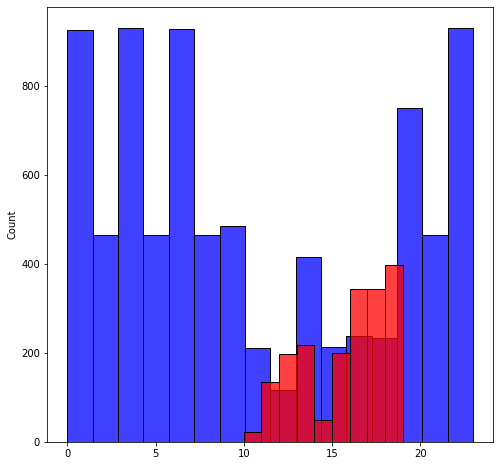

In [18]:
plt.figure(figsize=(8,8))
ax = sns.histplot(hours_0, color='blue')
ax = sns.histplot(hours_1,bins=9, color='red')

In [19]:
print(df.isnull().sum())

Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64


In [20]:
df.Room_Occupancy_Count.unique()

array([1, 2, 3, 0])

In [ ]:
def Room_Count():
    gen = df.Room_Occupancy_Count.value_counts()         
    title = 'Room Occupancy Count'           
    colors = ["#fee999",                     
    "#fca55d","#47a0b3",
    "#fca55d","#d90429",'#fca55d']
   
    
    fig_cmp = grp.Figure()
    fig_cmp.add_trace(grp.Bar(             
        x=gen.index,
        y=gen.values,
        text=gen.values,
        textposition='outside'))
    
    fig_cmp_color = [colors[4], colors[0]]          

    fig_cmp.update_traces(marker_color=fig_cmp_color, 
        marker=dict(line=dict(color='blue')))
    fig_cmp.update_yaxes(visible=True)
    fig_cmp.update_xaxes(title='<b>Room_ occupancy</b>')
    fig_cmp.update_layout(width=600, margin={
        'pad': 10}, title=title)
    
    show_figure = fig_cmp.show()
    return show_figure

Room_Count()  

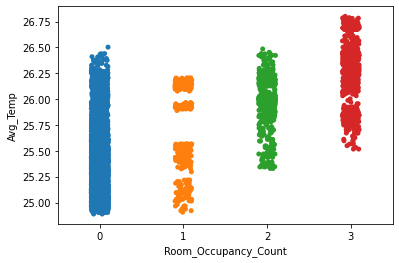

In [ ]:
sns.stripplot(x="Room_Occupancy_Count", y="Avg_Temp", data=df_g,jitter=True)

In [ ]:
mean_val=df_g.groupby(['Room_Occupancy_Count']).mean()
mean_val.insert(0, "Room_count", [0, 1, 2, 3], True)
mean_val

,Room_count,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,...,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Avg_Temp,Avg_Light,Avg_Sound,Avg_PIR
Room_Occupancy_Count,,,,,,,,,,,,,,,,,,,,,
0,0,25.336365,25.371105,24.929206,25.659785,2.686558,3.053354,13.368498,9.234565,0.076895,...,0.063765,0.079680,404.446403,-0.308078,0.002431,0.001458,25.324115,7.085744,0.068225,0.001945
1,1,25.741590,25.831285,25.297211,26.091002,120.209150,31.427015,54.230937,37.579521,0.444619,...,0.129216,0.094858,470.718954,0.310625,0.344227,0.041394,25.740272,60.861656,0.201503,0.192810
2,2,26.003837,26.207233,25.594893,26.183168,136.109626,134.804813,138.339572,30.482620,0.642553,...,0.646217,0.240013,713.168449,1.141881,0.478610,0.427807,25.997283,109.934158,0.514138,0.453209
3,3,26.066023,26.719035,25.827954,26.187378,113.317003,177.430836,156.393372,25.757925,0.556297,...,0.769813,0.249452,851.239193,2.145877,0.543228,0.655620,26.200097,118.224784,0.511290,0.599424


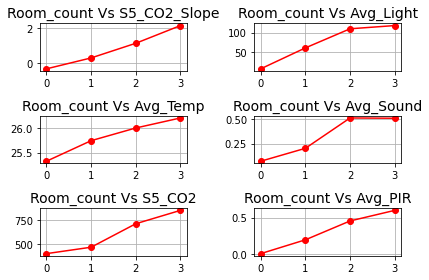

In [ ]:
fig, axs = plt.subplots(3, 2)
axs[0,0].plot(mean_val.Room_count,mean_val.S5_CO2_Slope , color='red', marker='o')
axs[0,0].set_title('Room_count Vs S5_CO2_Slope', fontsize=14)
axs[0,0].grid(True)

axs[1,0].plot(mean_val.Room_count,mean_val.Avg_Temp , color='red', marker='o')
axs[1,0].set_title('Room_count Vs Avg_Temp', fontsize=14)
axs[1,0].grid(True)

axs[0,1].plot(mean_val.Room_count,mean_val.Avg_Light , color='red', marker='o')
axs[0,1].set_title('Room_count Vs Avg_Light', fontsize=14)
axs[0,1].grid(True)

axs[1,1].plot(mean_val.Room_count,mean_val.Avg_Sound , color='red', marker='o')
axs[1,1].set_title('Room_count Vs Avg_Sound', fontsize=14)
axs[1,1].grid(True)

axs[2,1].plot(mean_val.Room_count,mean_val.Avg_PIR , color='red', marker='o')
axs[2,1].set_title('Room_count Vs Avg_PIR', fontsize=14)
axs[2,1].grid(True)

axs[2,0].plot(mean_val.Room_count,mean_val.S5_CO2 , color='red', marker='o')
axs[2,0].set_title('Room_count Vs S5_CO2', fontsize=14)
axs[2,0].grid(True)
fig.tight_layout()

##LDA

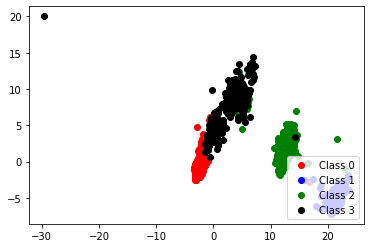

In [ ]:
y = df['Room_Occupancy_Count']      
X = df.iloc[:,2:18 ] 

lda = LDA(n_components=3) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 0', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 1', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 2', c='green')
plt.scatter(lda_transformed[y==3][0], lda_transformed[y==3][1], label='Class 3', c='black')

# Display legend and show plot
plt.legend(loc=4)

plt.show()

# PREPROCESSING

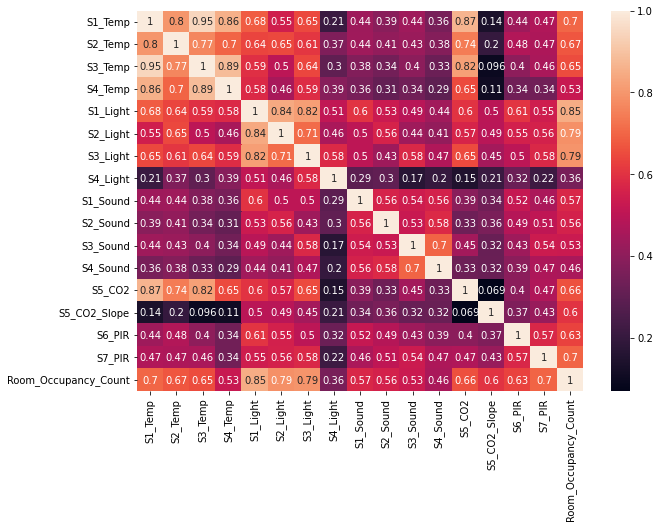

In [ ]:
cormat = df.corr()
round(cormat,2)
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cormat, annot= True);

cols = ['S3_Temp', 'S4_Temp', 'S1_Light', 'S5_CO2']

In [21]:
cols = ['S3_Temp', 'S4_Temp', 'S1_Light', 'S5_CO2']
df1 = df.copy()
df1.drop(columns = cols, inplace = True)

### Preprocessor

In [22]:
from pandas.core.common import random_state
class Preprocessor:

  def __init__(self, df, stnd = True, drop_corr = True, corr_cols =[], n=1000,
               undersample = True, oversample = True, encode_y = True, unskew = False, ) -> None:
    self.df = df
    self.stnd = stnd
    self.mean = None
    self.std = None
    self.drop_corr = drop_corr
    self.corr_cols = corr_cols
    self.undersample = undersample
    self.n = n
    self.oversample = oversample
    self.encode_y = encode_y
    self.unskew = unskew

  def undersample_0(self):
    df = pd.concat([self.X_train, self.y_train], axis=1)
    temp1 = df[df['Room_Occupancy_Count'] == 0]
    temp2 = df[df['Room_Occupancy_Count'] != 0]

    temp1 = temp1.sample(self.n, replace=True, random_state=0)
    #print(temp1.shape, temp2.shape)
    df = pd.concat([temp1, temp2], ignore_index=True)
    #print(self.df.shape)
    self.y_train = df['Room_Occupancy_Count']
    self.X_train = df.loc[:, df.columns!='Room_Occupancy_Count']

  def oversample_123(self):
    sm= SMOTE(random_state=42)
    self.X_train, self.y_train = sm.fit_resample(self.X_train, self.y_train)

  def data_split(self, df):
    self.y = df['Room_Occupancy_Count']
    self.X = df.loc[:, df.columns!='Room_Occupancy_Count']
    X_tv, X_test, y_tv, y_test = train_test_split(self.X, self.y, test_size = 0.25,
                                                  random_state= 0, stratify= self.y)
    X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, 
                                                      test_size = 0.2, 
                                                      random_state= 0,
                                                      stratify= y_tv)
    self.X_train = pd.DataFrame(X_train)
    self.X_val = pd.DataFrame(X_val)
    self.X_test = pd.DataFrame(X_test)
    self.y_train = pd.DataFrame(y_train)
    self.y_val = pd.DataFrame(y_val)
    self.y_test = pd.DataFrame(y_test)
  
  def fix_skew(self):
    self.df['S1_Sound'], _ = stats.boxcox((1+self.df['S1_Sound']))
    self.df['S2_Sound'], _ = stats.boxcox((1+self.df['S2_Sound']))
    self.df['S3_Sound'], _ = stats.boxcox((1+self.df['S3_Sound']))
    self.df['S4_Sound'], _ = stats.boxcox((1+self.df['S4_Sound']))

  def standardize_data(self):
    for column in self.X_train:
      if column in numerical_cols:
        self.mean = np.mean(self.X_train[column],0)
        self.std = np.std(self.X_train[column],0)
        self.X_train[column] = (self.X_train[column]-self.mean)/self.std
        self.X_test[column] = (self.X_test[column]-self.mean)/self.std
        self.X_val[column] = (self.X_val[column]-self.mean)/self.std

  def fix_collinearity(self):
    self.X_train.drop(columns= self.corr_cols)
    self.X_val.drop(columns= self.corr_cols)
    self.X_test.drop(columns= self.corr_cols)
  
  def encode(self):
    enc = OneHotEncoder(sparse=False, categories='auto')

    self.y_train = enc.fit_transform(self.y_train.values.reshape(len(self.y_train), -1))
    self.y_test = enc.transform(self.y_test.values.reshape(len(self.y_test), -1))
    self.y_val = enc.transform(self.y_val.values.reshape(len(self.y_val), -1))

  def preprocess(self):

    if(self.unskew):
      self.fix_skew()
    self.data_split(self.df)
    if (self.undersample):
      print("undersampling")
      self.undersample_0()
    if (self.oversample):
      print("oversampling")
      self.oversample_123()
    if (self.stnd):
      print('standardize')
      self.standardize_data()
    if (self.drop_corr):
      print("dropping correlated columns")
      self.fix_collinearity
    if (self.encode_y):
      self.encode()
    
    colnames = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'day_time']
    
    self.X_train.columns = colnames
    self.X_test.columns = colnames
    self.X_val.columns = colnames
    self.y_train = pd.DataFrame(self.y_train)
    self.y_val = pd.DataFrame(self.y_val)
    self.y_test = pd.DataFrame(self.y_test)

    return self.X_train, self.X_val, self.X_test, self.y_train, self.y_val, self.y_test

In [23]:
correlated_columns = ['S3_Temp', 'S4_Temp', 'S1_Light', 'S5_CO2']

In [24]:
df1 = df.copy()
df1['day_time'] = [1 if (date.hour >= 7 and date.hour <= 19) else 0 for date in df.Time]
df1.drop(columns=['Time'], inplace=True)


In [25]:
pp = Preprocessor(df1, corr_cols = correlated_columns)
X_train, X_val, X_test, y_train, y_val, y_test = pp.preprocess()
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
#X_train, X_val, X_test, y_train, y_val, y_test = pp.X_train, pp.X_val, pp.X_test, pp.y_train, pp.y_val, pp.y_test

undersampling
oversampling
standardize
dropping correlated columns
(4000, 17) (1520, 17) (2533, 17) (4000, 4) (1520, 4) (2533, 4)


### Skewness

S1_Light
S2_Light
S3_Light
S4_Light
S1_Sound
S2_Sound
S3_Sound
S4_Sound
S5_CO2
S5_CO2_Slope


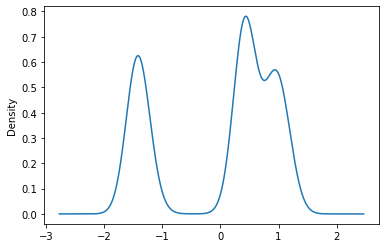

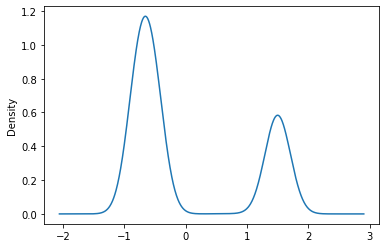

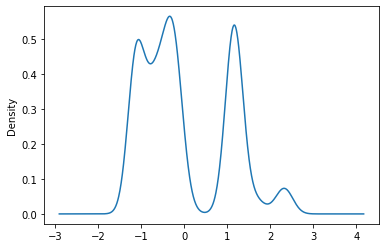

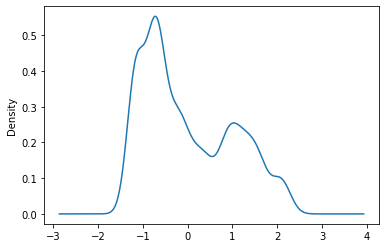

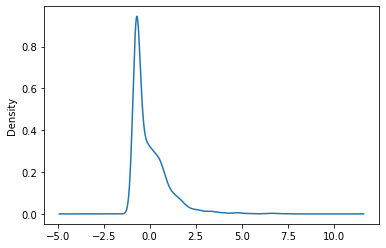

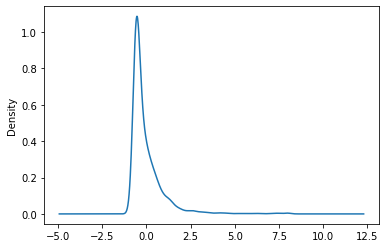

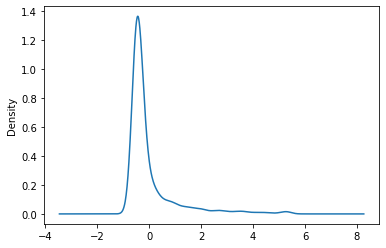

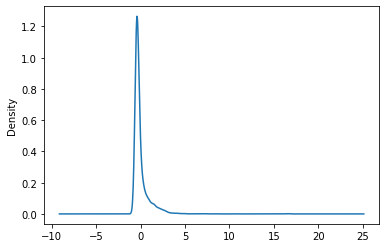

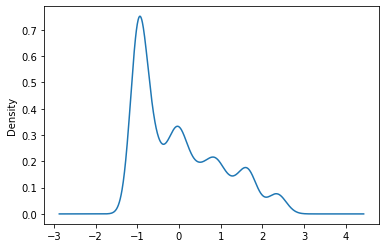

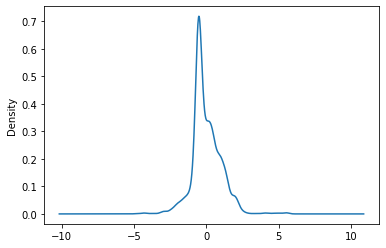

In [ ]:
for col in X_train:
  if col in numerical_cols:
    plt.figure()
    print(col)
    X_train[col].plot(kind = 'density')

### Outliers

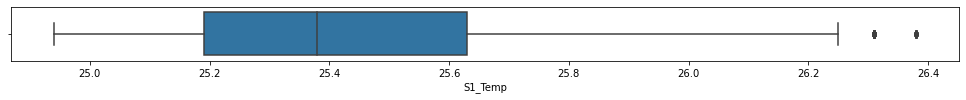

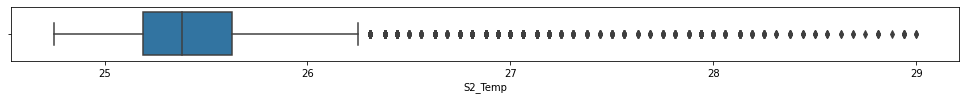

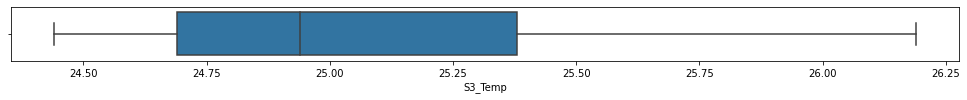

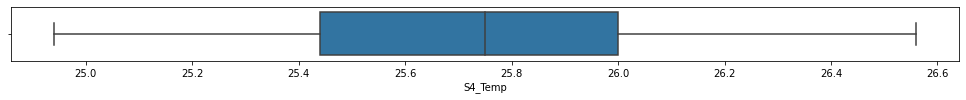

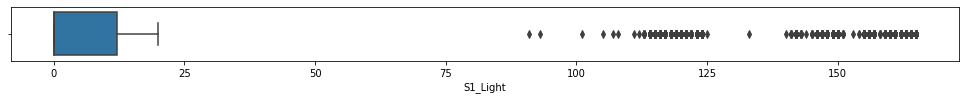

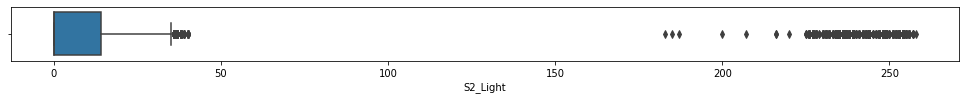

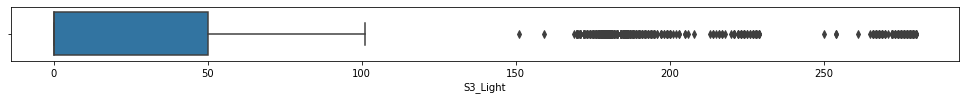

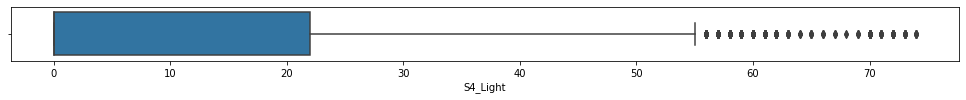

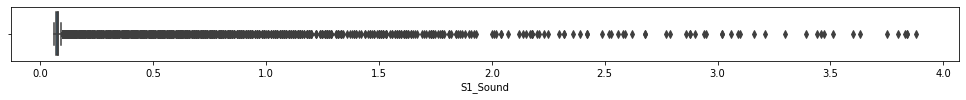

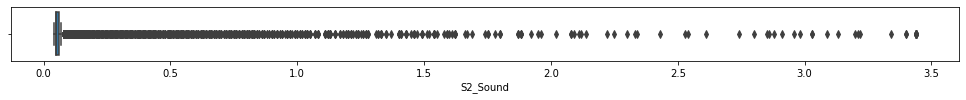

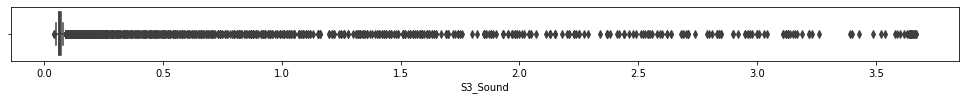

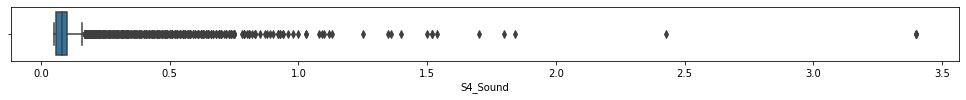

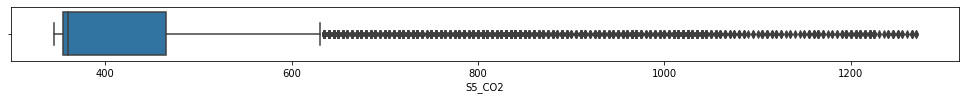

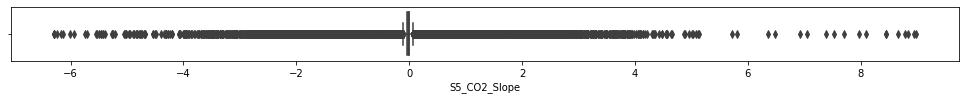

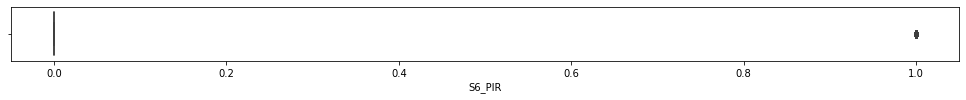

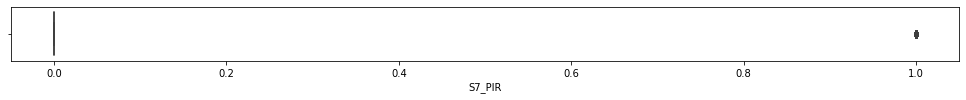

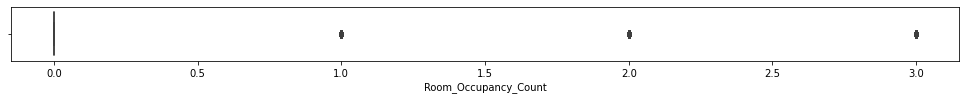

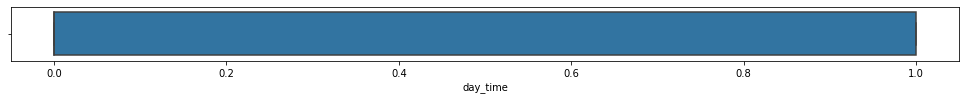

In [ ]:
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [ ]:
def remove_outliers(df1,column):
  if column in numerical_cols:
    percentile75 = np.percentile(df1[column], 75)
    percentile25 = np.percentile(df1[column], 25) 
    iqr = percentile75 - percentile25

    df1 = df1[df1[column] < percentile25 - 1.8*iqr]
    df1 = df1[df1[column] > percentile75+1.8*iqr]

In [ ]:
df1 = X_train.copy()
for col in df1:
  remove_outliers(df1,col)

### PCA

In [ ]:
class PCA():

  def __init__(self, df,undersample = True, n=1000, oversample=True, encode_y = True,) -> None:
    self.df = df
    self.n = n
    self.undersample = undersample
    self.oversample = oversample
    self.encode_y = encode_y
    self.n_components = None
    self.components = None
    self.eigenvectors = None

  def undersample_0(self):
    df = pd.concat([self.X_train, self.y_train], axis=1)
    temp1 = df[df['Room_Occupancy_Count'] == 0]
    temp2 = df[df['Room_Occupancy_Count'] != 0]

    temp1 = temp1.sample(self.n, replace=True, random_state=0)
    #print(temp1.shape, temp2.shape)
    df = pd.concat([temp1, temp2], ignore_index=True)
    #print(self.df.shape)
    self.y_train = df['Room_Occupancy_Count']
    self.X_train = df.loc[:, df.columns!='Room_Occupancy_Count']

  def oversample_123(self):
    sm= SMOTE(random_state=42)
    self.X_train, self.y_train = sm.fit_resample(self.X_train, self.y_train)

  def data_split(self, df):
    self.y = df['Room_Occupancy_Count']
    self.X = df.loc[:, df.columns!='Room_Occupancy_Count']
    X_tv, X_test, y_tv, y_test = train_test_split(self.X, self.y, test_size = 0.25,
                                                  random_state= 0, stratify= self.y)
    X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size = 0.2, 
                                                      random_state= 0, stratify= y_tv)
    self.X_train = pd.DataFrame(X_train)
    self.X_val = pd.DataFrame(X_val)
    self.X_test = pd.DataFrame(X_test)
    self.y_train = pd.DataFrame(y_train)
    self.y_val = pd.DataFrame(y_val)
    self.y_test = pd.DataFrame(y_test)
    
  def standardize_data(self):
    temp = self.X_train
    for column in temp:
      numerical_types = ['float64', 'int64']
      if temp.dtypes[column] in numerical_types:
        mean = np.mean(self.X_train[column],0)
        std = np.std(self.X_train[column],0)
        self.X_train[column] = (self.X_train[column]-mean)/std
        self.X_test[column] = (self.X_test[column]-mean)/std
        self.X_val[column] = (self.X_val[column]-mean)/std

  def encode(self):
    enc = OneHotEncoder(sparse=False, categories='auto')

    self.y_train = enc.fit_transform(self.y_train.values.reshape(len(self.y_train), -1))
    self.y_test = enc.transform(self.y_test.values.reshape(len(self.y_test), -1))
    self.y_val = enc.transform(self.y_val.values.reshape(len(self.y_val), -1))

  def fit(self):
    self.data_split(self.df)
    if (self.undersample):
      print("undersampling")
      self.undersample_0()
    if (self.oversample):
      print("undersampling")
      self.oversample_123()
    if (self.encode_y):
      self.encode()    
    print('standardizing')
    self.standardize_data()

    #pca
    cov = np.dot(self.X_train.T, self.X_train)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    P = eigenvectors
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx].T
    self.eigenvectors = eigenvectors[idx].T
    cumsum = []
    for i in range(len(eigenvalues)+1):
      pc = eigenvalues[0: i]
      cumsum.append(pc.sum()/eigenvalues.sum())
      print("Variance captured by {} Principal Components is {}%".format(i,pc.sum()/eigenvalues.sum()))
  
  def transform(self,n_components):
    self.components = self.eigenvectors[0: n_components].T
    self.X_train = pd.DataFrame(np.dot(self.X_train,self.components))
    self.X_test = pd.DataFrame(np.dot(self.X_test,self.components))
    self.X_val = pd.DataFrame(np.dot(self.X_val,self.components))
    self.y_train = pd.DataFrame(self.y_train)
    self.y_val = pd.DataFrame(self.y_val)
    self.y_test = pd.DataFrame(self.y_test)
    return self.X_train, self.X_val, self.X_test, self.y_train, self.y_val, self.y_test

In [ ]:
df1 = df.copy()
df1['day_time'] = [1 if (date.hour >= 7 and date.hour <= 19) else 0 for date in df.Time]
df1.drop(columns=['Time'], inplace=True)

In [ ]:
pca = PCA(df1,encode_y=False)
pca.fit()

undersampling
undersampling
standardizing
Variance captured by 0 Principal Components is 0.0%
Variance captured by 1 Principal Components is 0.43371086015539445%
Variance captured by 2 Principal Components is 0.5526946941013136%
Variance captured by 3 Principal Components is 0.6474742134164487%
Variance captured by 4 Principal Components is 0.7070257932630633%
Variance captured by 5 Principal Components is 0.7561189536649479%
Variance captured by 6 Principal Components is 0.8000864721417629%
Variance captured by 7 Principal Components is 0.8373184192910686%
Variance captured by 8 Principal Components is 0.8714181639891458%
Variance captured by 9 Principal Components is 0.9026997594811724%
Variance captured by 10 Principal Components is 0.9302432682001006%
Variance captured by 11 Principal Components is 0.9495587526310967%
Variance captured by 12 Principal Components is 0.967234473040188%
Variance captured by 13 Principal Components is 0.98173560375804%
Variance captured by 14 Principal

In [ ]:
X_pca_tr, X_pca_val, X_pca_test, y_pca_tr, y_pca_val, y_pca_test = pca.transform(n_components=6)
print(X_pca_tr.shape, X_pca_val.shape, X_pca_test.shape, y_pca_tr.shape, y_pca_val.shape, y_pca_test.shape)

(4000, 6) (1520, 6) (2533, 6) (4000, 1) (1520, 1) (2533, 1)


# NEUral NetWORK

In [26]:
pp = Preprocessor(df1, corr_cols = correlated_columns)
X_train, X_val, X_test, y_train, y_val, y_test = pp.preprocess()
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
#X_train, X_val, X_test, y_train, y_val, y_test = pp.X_train, pp.X_val, pp.X_test, pp.y_train, pp.y_val, pp.y_test

undersampling
oversampling
standardize
dropping correlated columns
(4000, 17) (1520, 17) (2533, 17) (4000, 4) (1520, 4) (2533, 4)


In [27]:
sm= SMOTE(random_state=42)
X_val, y_val = sm.fit_resample(X_val.to_numpy(), y_val.to_numpy())

In [9]:
!pip install keras-tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from keras_tqdm import TQDMNotebookCallback
from numpy.random import seed
from keras import regularizers
from keras import optimizers

## testing with normal preprocessed data

Epoch 1/200
80/80 [==============================] - 1s 9ms/step - loss: 1.8661 - accuracy: 0.3610 - val_loss: 1.2884 - val_accuracy: 0.8077
Epoch 2/200
80/80 [==============================] - 0s 5ms/step - loss: 1.1034 - accuracy: 0.5242 - val_loss: 1.2417 - val_accuracy: 0.8429
Epoch 3/200
80/80 [==============================] - 0s 5ms/step - loss: 1.0454 - accuracy: 0.6572 - val_loss: 1.2055 - val_accuracy: 0.6802
Epoch 4/200
80/80 [==============================] - 0s 5ms/step - loss: 0.9915 - accuracy: 0.6615 - val_loss: 1.1424 - val_accuracy: 0.8330
Epoch 5/200
80/80 [==============================] - 0s 5ms/step - loss: 0.9411 - accuracy: 0.6630 - val_loss: 1.0909 - val_accuracy: 0.8504
Epoch 6/200
80/80 [==============================] - 0s 5ms/step - loss: 0.8906 - accuracy: 0.6633 - val_loss: 1.0544 - val_accuracy: 0.7951
Epoch 7/200
80/80 [==============================] - 0s 5ms/step - loss: 0.8407 - accuracy: 0.6875 - val_loss: 0.9839 - val_accuracy: 0.8733
Epoch 8/200
8

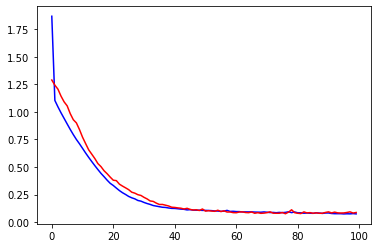

In [ ]:
seed(1)

layer1_shape = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(layer1_shape, input_dim = layer1_shape, activation = 'relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model = model.fit(X_train, y_train, epochs=200, batch_size=50,
          validation_data = (X_test, y_test),
          shuffle = True)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
test_loss, test_acc = model.evaluate(X_train, y_train)
print('Train accuracy:', test_acc)

train_loss = Model.history['loss']
val_loss   = Model.history['val_loss']
train_acc  = Model.history['accuracy']
val_acc    = Model.history['val_accuracy']
xc         = range(100)

plt.figure()
plt.plot(xc, train_loss[0:100], color = 'blue', label='training loss')
plt.plot(xc, val_loss[0:100], color = 'red', label='testing loss')

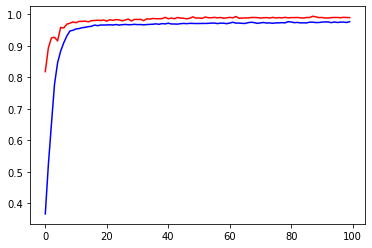

In [ ]:
train_loss = Model.history['loss']
val_loss   = Model.history['val_loss']
train_acc  = Model.history['accuracy']
val_acc    = Model.history['val_accuracy']
xc         = range(100)

plt.figure()
plt.plot(xc, train_acc[0:100], color = 'blue', label='training acc')
plt.plot(xc, val_acc[0:100], color = 'red', label='testing acc')

## Hyperparameters

In [ ]:
learning_rate = [0.005,0.01,0.001,0.0001]
maxiter = [125]
reg_params = [0.05,0.01,0.001,0.005]

for i in learning_rate:
  for j in maxiter:
    for k in reg_params:
        

      layer1_shape = X_train.shape[1]
      model = tf.keras.Sequential([
          tf.keras.layers.Dense(16, input_dim = layer1_shape,
                                kernel_regularizer=regularizers.L1(k),
                                activation = 'relu'),
          tf.keras.layers.Dense(8,kernel_regularizer=regularizers.L1(k),
                                activation='relu'),
          tf.keras.layers.Dense(4,kernel_regularizer=regularizers.L1(k),
                                activation='softmax')
      ])
      opt = tf.keras.optimizers.Adam(learning_rate=i)

      model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
      model.fit(X_train, y_train, epochs=j,validation_data = (X_test, y_test),
          shuffle = True)

      print('--LR:',i)
      print('--Epochs:', j)
      print('--Reg params',k)
      
      val_loss, val_acc = model.evaluate(X_val, y_val)
      print('Val accuracy:', val_acc)

      test_loss, test_acc = model.evaluate(X_test, y_test)
      print('Test accuracy:', test_acc)


Epoch 1/125
125/125 [==============================] - 1s 5ms/step - loss: 4.9951 - accuracy: 0.4227 - val_loss: 1.9357 - val_accuracy: 0.8579
Epoch 2/125
125/125 [==============================] - 0s 3ms/step - loss: 2.1606 - accuracy: 0.5038 - val_loss: 1.6037 - val_accuracy: 0.8764
Epoch 3/125
125/125 [==============================] - 0s 3ms/step - loss: 1.9974 - accuracy: 0.5153 - val_loss: 1.4502 - val_accuracy: 0.8579
Epoch 4/125
125/125 [==============================] - 0s 3ms/step - loss: 1.8690 - accuracy: 0.4980 - val_loss: 1.4322 - val_accuracy: 0.8579
Epoch 5/125
125/125 [==============================] - 0s 3ms/step - loss: 1.7678 - accuracy: 0.4972 - val_loss: 1.3293 - val_accuracy: 0.8595
Epoch 6/125
125/125 [==============================] - 0s 3ms/step - loss: 1.6646 - accuracy: 0.4857 - val_loss: 1.1143 - val_accuracy: 0.8638
Epoch 7/125
125/125 [==============================] - 0s 3ms/step - loss: 1.5651 - accuracy: 0.4935 - val_loss: 0.9597 - val_accuracy: 0.8851

## testing with PCA Data

In [ ]:
layer1_shape = X_pca_tr.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(layer1_shape, input_dim = layer1_shape, activation = 'relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_pca_tr, y_pca_tr, epochs=100)

val_loss, val_acc = model.evaluate(X_pca_val, y_pca_val)
print('Val accuracy:', val_acc)

test_loss, test_acc = model.evaluate(X_pca_test, y_pca_test)
print('Test accuracy:', test_acc)

Epoch 1/100
125/125 [==============================] - 1s 2ms/step - loss: 1.3200 - accuracy: 0.4140
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 1.0764 - accuracy: 0.6195
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.8190 - accuracy: 0.7117
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 0.6338 - accuracy: 0.7922
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.8353
Epoch 6/100
125/125 [==============================] - 0s 4ms/step - loss: 0.4185 - accuracy: 0.8685
Epoch 7/100
125/125 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.9050
Epoch 8/100
125/125 [==============================] - 1s 6ms/step - loss: 0.3004 - accuracy: 0.9202
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2657 - accuracy: 0.9245
Epoch 10/100
125/125 [==============================] - 0s 2ms/step - loss: 0.2408 - accura

## testing with best parameters

Epoch 1/125
125/125 [==============================] - 4s 18ms/step - loss: 1.5680 - accuracy: 0.2747 - val_loss: 1.2900 - val_accuracy: 0.8902
Epoch 2/125
125/125 [==============================] - 2s 16ms/step - loss: 0.8302 - accuracy: 0.6927 - val_loss: 0.3821 - val_accuracy: 0.9218
Epoch 3/125
125/125 [==============================] - 2s 12ms/step - loss: 0.4756 - accuracy: 0.8660 - val_loss: 0.2569 - val_accuracy: 0.9589
Epoch 4/125
125/125 [==============================] - 2s 20ms/step - loss: 0.3351 - accuracy: 0.9170 - val_loss: 0.2065 - val_accuracy: 0.9751
Epoch 5/125
125/125 [==============================] - 1s 11ms/step - loss: 0.2570 - accuracy: 0.9482 - val_loss: 0.2050 - val_accuracy: 0.9799
Epoch 6/125
125/125 [==============================] - 1s 12ms/step - loss: 0.2264 - accuracy: 0.9542 - val_loss: 0.1559 - val_accuracy: 0.9826
Epoch 7/125
125/125 [==============================] - 1s 10ms/step - loss: 0.2445 - accuracy: 0.9475 - val_loss: 0.1737 - val_accuracy:

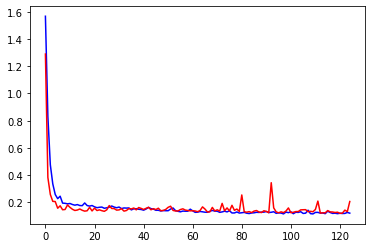

In [37]:
seed(1)

layer1_shape = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(layer1_shape, input_dim = layer1_shape,
                          kernel_regularizer=regularizers.L1(0.001),
                          activation = 'relu'),
    tf.keras.layers.Dense(8,kernel_regularizer=regularizers.L1(0.001),
                          activation='relu'),
    tf.keras.layers.Dense(4,kernel_regularizer=regularizers.L1(0.001),
                          activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,
          loss='categorical_crossentropy',
          metrics=['accuracy'])
Model = model.fit(X_train, y_train, epochs=125,
          validation_data = (X_test, y_test),
          shuffle = True)


test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
train_loss, train_acc = model.evaluate(X_train, y_train)
print('Train accuracy:', train_acc)

xc= range(125)
train_loss = Model.history['loss']
val_loss   = Model.history['val_loss']
train_acc  = Model.history['accuracy']
val_acc    = Model.history['val_accuracy']
plt.figure()
plt.plot(xc, train_loss, color = 'blue', label='training loss')
plt.plot(xc, val_loss, color = 'red', label='testing loss')

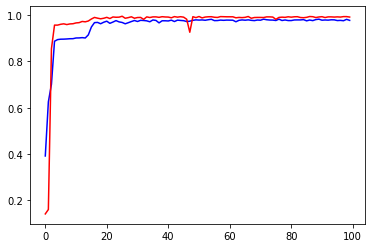

In [34]:
train_loss = Model.history['loss']
val_loss   = Model.history['val_loss']
train_acc  = Model.history['accuracy']
val_acc    = Model.history['val_accuracy']
xc         = range(100)

plt.figure()
plt.plot(xc, train_acc[0:100], color = 'blue', label='training acc')
plt.plot(xc, val_acc[0:100], color = 'red', label='testing acc')

# MODELLING - K NEAREST NEIGHBORS

CHECKING OPTIMAL K VALUE

In [ ]:
class KNearestNeighbor:
    
    def __init__(self,X_tr,y_tr,X_test,y_test):
        self.X_train = X_tr
        self.X_test = X_test
        self.y_train = y_tr 
        self.y_test = y_test 

    def dist(self, a, b):
        dist = np.sqrt(np.sum((a-b)**2))
        return dist

    def dist_all(self,point):
        dist_all = []
        for neighbor in self.X_train:
            dist = self.dist(point, neighbor)
            dist_all.append(dist)
        return np.array(dist_all)

    def fit(self,k):
        preds = []
        train_target = self.y_train.copy()
        train_target = train_target.reshape(-1,1)
        for point in self.X_test:  
            dist_all = self.dist_all(point).reshape(-1,1)
            neighbors = np.concatenate((dist_all, train_target),axis = 1,)
            # sorts training points on the basis of distance  and select k nearest
            neighbors_sorted = neighbors[neighbors[:, 0].argsort()]
            k_neighbors = neighbors_sorted[:k] 
            # selects label with highest frequency
            frequency = np.unique(k_neighbors[:, 1], return_counts=True)
            target_class = frequency[0][frequency[1].argmax()]     
            preds = np.append(preds, target_class)
        return preds

    def evaluate(self,y_preds):
 
        correct,wrong,wrong_0,wrong_1,wrong_2,wrong_3 = 0,0,0,0,0,0    
        for i in range(len(self.y_test)):
          if int(self.y_test[i]) == int(y_preds[i]):
              correct += 1
          else:
            wrong +=1
            if self.y_test[i] ==0:
                wrong_0+=1
            elif self.y_test[i] ==1:
                wrong_1+=1
            elif self.y_test[i] ==2:
                wrong_2+=1
            elif self.y_test[i] ==3:
                wrong_3+=1
                          
        error = wrong/(correct+wrong)
        print('Error', error)
        return error
    

    

In [ ]:
correlated_columns = ['S3_Temp', 'S4_Temp', 'S1_Light', 'S5_CO2']
pp = Preprocessor(df1, corr_cols = correlated_columns, encode_y=False)
X_train, X_val, X_test, y_train, y_val, y_test = pp.preprocess()
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

undersampling
oversampling
standardize
dropping correlated columns
(4000, 17) (1520, 17) (2533, 17) (4000, 1) (1520, 1) (2533, 1)


In [ ]:
knn = KNearestNeighbor(X_train.to_numpy(),y_train.to_numpy(),X_test.to_numpy(),y_test.to_numpy()) 
errors = []

In [ ]:
 for k in range(20,40,2): 
  y_preds = knn.fit(k)
  error = knn.evaluate(y_preds) 
  errors.append(error) 

Error 0.012238452427951046
Error 0.013422818791946308
Error 0.011448874851954205
Error 0.012238452427951046
Error 0.011843663639952625
Error 0.013028030003947888
Error 0.016581129095933674
Error 0.024871693643900513
Error 0.026056060007895777
Error 0.02803000394788788


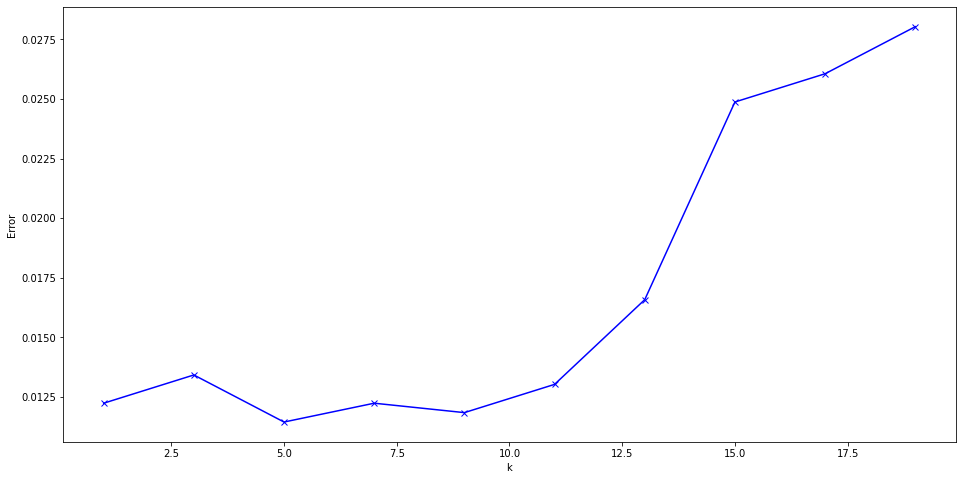

In [ ]:
k= np.arange(1,20,2) 
plt.figure(figsize=(16,8)) 
plt.plot(k, errors, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Error') 
plt.show()

Using k=5

In [ ]:
y_preds = knn.fit(5)
error = knn.evaluate(y_preds) 


Error 0.010659297275957363


In [ ]:
print(classification_report(y_preds,y_test.to_numpy()))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2047
         1.0       0.99      0.97      0.98       118
         2.0       0.97      0.94      0.96       192
         3.0       0.95      0.93      0.94       176

    accuracy                           0.99      2533
   macro avg       0.98      0.96      0.97      2533
weighted avg       0.99      0.99      0.99      2533



# Softmax Logistic Regression

In [ ]:
class LogisticRegression:
  def __init__(self,X_train,X_val,X_test,y_train,y_val,y_test, learningRate, tolerance, maxIteration,reg,reg_param,) -> None:
    self.X_train = X_train
    self.X_val=X_val
    self.X_test= X_test
    self.y_train = y_train
    self.y_val=y_val
    self.y_test = y_test
    self.learningRate = learningRate
    self.tolerance = tolerance
    self.maxIteration = maxIteration
    self.error = []
    self.iter_count = []
    self.reg = reg
    self.reg_param = reg_param

  def datasetReader(self):
    
    X_train, X_val, X_test, y_train, y_val, y_test = self.data

    return  X_train, X_val, X_test, y_train, y_val, y_test

  def add_X0(self, X):
    return np.column_stack([np.ones(X.shape[0]),X])

  # def sigmoid(self,z):
  #   sig = 1 / (1 + np.exp(-z))
  #   return sig

  # def softmax(self,z):
  #     z = z - np.max(z)
  #     z = np.exp(z)
  #     return np.divide(z , z.sum(axis=0))
  
  def costFunction(self,X,Y):
      W = self.w
      N = X.shape[0]
      Z = - X @ W
      y_hat = softmax(Z, axis = 1) 
      cost  = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1)))) 
      if self.reg: 
        cost  = cost + (self.reg_param * ( np.sum(np.square(self.w)) ) )
      return 0.5* np.mean(cost)

  def gradient(self, X,Y):
    W = self.w
    Z = - X @ W
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) 
    return gd

  def gradientDescent(self, X,y):
    iters = []
    errors = []
    last_error = 0
    testing_errors = []
    training_errors = []
    for i in tqdm(range(self.maxIteration)):
      iters.append(i)
      if self.reg: # L2 regularisation 
        w_update = self.w * (1 - self.learningRate *( self.reg_param / X.shape[0]))
        self.w  = w_update - (self.learningRate  * self.gradient(X,y)) 
      else: 
        self.w = self.w - self.learningRate * self.gradient(X,y)

      currentError = self.costFunction(X,y)
      diff = last_error - currentError
      last_error = currentError
      errors.append(currentError)

      y_tr_hat = self.pred(self.X_train)
      training_accuracy, precision,recall = self.evaluate(self.y_train.to_numpy(), y_tr_hat.to_numpy())
      training_errors.append(training_accuracy)
      y_test_hat = self.pred(self.X_test)
      testing_accuracy, precision,recall= self.evaluate(self.y_test.to_numpy(), y_test_hat.to_numpy())
      testing_errors.append(testing_accuracy)


      if np.abs(diff) < self.tolerance:
        print('Model stopped learning')
        break
    plt.plot(iters, training_errors, color='blue',label = 'training error')
    plt.plot(iters, testing_errors, color='red',label = 'testing error')
    plt.show()
    plt.plot(iters,errors)
    plt.show()
    print(errors.index(min(errors)))
    return

  def pred(self,X):
    z = - X @ self.w
    np.column_stack([np.ones([X.shape[0],1]),X])
    pred = softmax(z, axis = 1)
    return pred

  def evaluate(self,y,y_hat):
    y = np.argmax(y, axis = 1)
    y_hat = np.argmax(y_hat, axis = 1)
    accuracy = np.mean(y==y_hat)
    precision = (y&y_hat).sum() / y_hat.sum()
    recall = (y&y_hat).sum() / y.sum()
    '''
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_hat)

    ## Get Class Labels
    class_names = y_train.columns.values

    # Plot confusion matrix in a beautiful manner
    fig = plt.figure(figsize=(16, 14))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted', fontsize=20)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(class_names, fontsize = 10)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True', fontsize=20)
    ax.yaxis.set_ticklabels(class_names, fontsize = 10)
    plt.yticks(rotation=0)

    plt.title('Refined Confusion Matrix', fontsize=20)

    plt.savefig('ConMat24.png')
    plt.show()
    '''

    return accuracy,precision,recall

  def fit(self):
    
    self.add_X0(self.X_train)
    print('Solving using gradient descent')
    #print(y_train.shape)
    #initializing weights
    self.w = np.random.RandomState(25).randn(self.X_train.shape[1], self.y_train.shape[1]) * (2 / np.sqrt(self.X_train.shape[0]))
    #self.w = np.ones(X_train.shape[1],dtype = np.float64)*0
  
    self.gradientDescent(self.X_train,self.y_train)
    #print(self.w)
  def predict(self,X,y):
    y_val_hat = self.pred(X)
    #y_test_hat = self.predict(self.X_test)
    accuracy,precision,recall = self.evaluate(y.to_numpy(), y_val_hat.to_numpy())
    #accuracy_T = self.evaluate(self.y_test.to_numpy(), y_test_hat.to_numpy())

    print(self.learningRate,self.reg_param)
    print('Accuracy is {}',format(accuracy))
    print('precision is {}',format(precision))
    print('recall is {}',format(recall))




undersampling
undersampling
standardizing
Variance captured by 0 Principal Components is 0.0%
Variance captured by 1 Principal Components is 0.49372093651378535%
Variance captured by 2 Principal Components is 0.6180088356132694%
Variance captured by 3 Principal Components is 0.700090018752357%
Variance captured by 4 Principal Components is 0.7562387478267663%
Variance captured by 5 Principal Components is 0.8038583691598393%
Variance captured by 6 Principal Components is 0.8447980541204152%
Variance captured by 7 Principal Components is 0.8785037995563598%
Variance captured by 8 Principal Components is 0.9064408481283031%
Variance captured by 9 Principal Components is 0.9276598272226568%
Variance captured by 10 Principal Components is 0.9467656003709899%
Variance captured by 11 Principal Components is 0.962618281915689%
Variance captured by 12 Principal Components is 0.974262383429736%
Variance captured by 13 Principal Components is 0.9832208572780614%
Variance captured by 14 Principal

 50%|█████     | 376/750 [00:05<00:05, 73.88it/s]


Model stopped learning


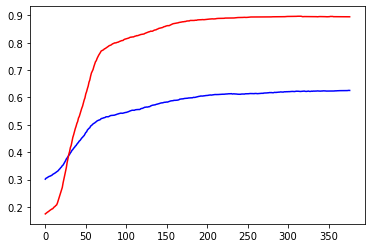

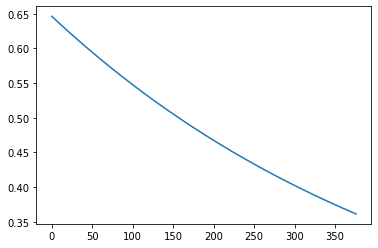

376
0.0005 0.01
Accuracy is {} 0.6255
precision is {} 0.8188452805708726
recall is {} 0.8415
0.0005 0.01
Accuracy is {} 0.8179025888547609
precision is {} 0.0
recall is {} nan
0.0005 0.01
Accuracy is {} 0.8945913936044216
precision is {} 0.7902033271719039
recall is {} 0.8482142857142857


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from tqdm import tqdm
lr_error = []
reg_param = [0.01]
learning_rate = [0.0005]
maxiter = [750]
pca = PCA(df)
pca.fit()
X_pca_tr, X_pca_val, X_pca_test, y_pca_tr, y_pca_val, y_pca_test = pca.transform(n_components=6)

for i in learning_rate:
  for j in reg_param:
    for k in maxiter:
      reg_logit = LogisticRegression( X_pca_tr, X_pca_val, X_pca_test, y_pca_tr, y_pca_val, y_pca_test,learningRate = i, tolerance= 0.0005, maxIteration = k,reg = True,reg_param = j)
      reg_logit.fit()

      reg_logit.predict(X_pca_tr,y_pca_tr)
      reg_logit.predict(X_pca_val,y_pca_val)
      reg_logit.predict(X_pca_test,y_pca_test)
      
      lr_error.append(np.mean(reg_logit.error))

In [ ]:
df.S5_CO2_Slope = (df.S5_CO2_Slope - min(df['S5_CO2_Slope']))/(max(df['S5_CO2_Slope']-min(df['S5_CO2_Slope'])))

In [ ]:
cols = ['Time']
df.drop(columns = cols, inplace = True)
y = df['Room_Occupancy_Count']
X = df.loc[:, df.columns!='Room_Occupancy_Count']
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X, y, test_size = 0.25,
                                                  random_state= 0, stratify= y)
X_df_train

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
4411,25.38,25.44,24.94,25.75,0,0,0,0,0.07,0.05,0.06,0.07,365,0.412135,0,0
3055,26.00,26.31,25.44,26.25,162,250,84,62,0.44,2.91,0.30,0.20,560,0.711480,1,1
5890,25.38,25.38,25.31,26.06,19,22,80,59,0.08,0.10,0.08,0.10,355,0.412135,0,0
2815,25.19,25.19,24.94,25.88,14,16,65,46,0.08,0.05,0.06,0.06,360,0.412638,0,0
2660,25.06,25.13,24.69,25.63,10,10,48,33,0.08,0.05,0.06,0.06,355,0.409114,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,25.69,25.50,25.19,26.06,155,245,72,53,0.80,1.00,0.29,0.27,385,0.422709,0,1
3151,25.94,26.94,25.56,26.25,14,15,72,52,0.16,0.18,0.18,0.11,595,0.297080,0,0
9751,25.13,25.13,24.56,25.19,0,0,0,0,0.08,0.04,0.06,0.08,345,0.412135,0,0
2680,25.13,25.13,24.75,25.69,10,11,49,34,0.08,0.04,0.06,0.06,360,0.422709,0,0


In [ ]:
class NaiveBayes:
    
    def __init__(self,X_train,X_test, y_train,y_test):
        self.X_train = X_train
        self.X_test =X_test
        self.y_train = y_train
        self.y_test = y_test
                
    def fit_dist(self,data):
        mu = np.mean(data)
        sigma = np.std(data)
        dist = norm(mu,sigma)
        return dist

    def probability(self,X,prior,distribution):
        self.num_features = self.X_train.shape[1]
        res = []

        for j in range(self.num_features):
            for k,v in distribution.items():
              res.append(v.pdf(X[j]))
        res = res[0::self.num_features]
        print('res',res)
        a = np.prod(res, axis=None, dtype=None, out=None)
        print('a',a)
        print('prior',prior)
        return a*prior



          
          
    def run_model(self):

        self.X_train = self.X_train.values
        self.X_test = self.X_test.values
        self.y_train = self.y_train.values
        self.y_test = self.y_test.values

        self.num_features = self.X_train.shape[1]

        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]
        self.X2_train = self.X_train[self.y_train == 2]
        self.X3_train = self.X_train[self.y_train == 3]
        
        

        self.prior_y0 = len(self.X0_train) / len(self.X_train)
        self.prior_y1 = len(self.X1_train) / len(self.X_train)
        self.prior_y2 = len(self.X2_train) / len(self.X_train)
        self.prior_y3 = len(self.X3_train) / len(self.X_train)

           
        print('prior',self.prior_y0)
        print(self.prior_y1)
        print(self.prior_y2)
        print(self.prior_y3)
            
        
        

        self.dist1 = {}
        self.dist2 = {}
        self.dist3 = {}
        self.dist4 = {}


        
        for i in range(self.num_features):
            self.dist1['dist_'+'X'+str(i+1)+'y0'] = self.fit_dist(self.X0_train[:,i])
            self.dist2['dist_'+'X'+str(i+1)+'y1'] = self.fit_dist(self.X1_train[:,i])
            self.dist3['dist_'+'X'+str(i+1)+'y2'] = self.fit_dist(self.X2_train[:,i])
            self.dist4['dist_'+'X'+str(i+1)+'y3'] = self.fit_dist(self.X3_train[:,i])
           
            
        print('dist',self.dist1)
        print(self.dist2)
        print(self.dist3)
        print(self.dist4)
          


    def predict_test(self):
      
        right = 0
        wrong = 0
        count0 = 0
        count1 = 1
        count2 = 2
        count3 = 3
       

        
        train_start_time = datetime.now()
        for sample, target in zip(self.X_test, self.y_test):
            
            py0 = self.probability(sample,self.prior_y0,self.dist1)
            py1 = self.probability(sample,self.prior_y1,self.dist2)
            py2 = self.probability(sample,self.prior_y2,self.dist3)
            py3 = self.probability(sample,self.prior_y3,self.dist4)
           
            
            print('p(y=0 | %s) = %.3f' % (sample, py0*100))
            print('p(y=1 | %s) = %.3f' % (sample, py1*100))
            print('p(y=2 | %s) = %.3f' % (sample, py2*100))
            print('p(y=3 | %s) = %.3f' % (sample, py3*100))
            

            
            print('model predicted class {} and the truth was {} \n' .format(np.argmax([py0*10,py1*10,py2*10,py3*10]), target))
            if (np.argmax([py0*100,py1*100,py2*100,py3*100]) == target):
                print('Right\n')
                right+=1
            else:
                if target == 0:
                    count0+=1
                elif target ==1:
                    count1+=1
                elif target ==2:
                    count2+=1
                elif target ==3:
                    count3+=1
                
                print('class being misclassified is',target)
                print('Wrong\n')
                wrong+=1
        #train_end_time = datetime.now()
        #train_time = train_end_time - train_start_time
        print('testing error :',(((wrong)/(right+wrong))*100))
        print('count for class 0 :', count0)
        print('count for class 1 :', count1)
        print('count for class 2 :', count2)
        print('count for class 3 :', count3)
        
      
        #print('Test Time', train_time)
        
    def predict_train(self):
      
        right = 0
        wrong = 0
        count0 = 0
        count1 = 1
        count2 = 2
        count3 = 3
       
        test_start_time = datetime.now()
        for sample, target in zip(self.X_train, self.y_train):
           
            py0 = self.probability(sample,self.prior_y0,self.dist1)
            py1 = self.probability(sample,self.prior_y1,self.dist2)
            py2 = self.probability(sample,self.prior_y2,self.dist3)
            py3 = self.probability(sample,self.prior_y3,self.dist4)
            
            
            print('model predicted class {} and the truth was {} \n' .format(np.argmax([py0*100,py1*100,py2*100,py3*100]), target))
            if (np.argmax([py0*100,py1*100,py2*100,py3*100]) == target):
                print('Right\n')
                right+=1
            else:
                if target == 0:
                    count0+=1
                elif target ==1:
                    count1+=1
                elif target ==2:
                    count2+=1
                elif target ==3:
                    count3+=1
               
                
                print('class being misclassified is',target)
                print('Wrong\n')
                wrong+=1
        #test_end_time = datetime.now()
        #test_time = test_end_time - test_start_time
        print('training Error:',(((wrong)/(right+wrong))*100))
        print('count for class 0 :', count0)
        print('count for class 1 :', count1)
        print('count for class 2 :', count2)
        print('count for class 3 :', count3)

       
       
        #print('Train Time', test_time)
        

In [ ]:
from datetime import datetime
nb = NaiveBayes(X_df_train, y_df_train,X_df_test,y_df_test)
nb.run_model()
nb.predict_test()


prior 0.8122696155871512
0.04528699315429173
0.07385466034755134
0.0685887309110058
dist {'dist_X1y0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c9e252110>, 'dist_X2y0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c9e226890>, 'dist_X3y0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c9c953b10>, 'dist_X4y0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c9c8ea590>, 'dist_X5y0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2ca125ee50>, 'dist_X6y0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c9c9599d0>, 'dist_X7y0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c9c8eaa90>, 'dist_X8y0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c9c900210>, 'dist_X9y0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c9c900b10>, 'dist_X10y0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c9c91f250>, 'dist_X11y0': <scipy.stats._distn_infrastructure.rv_frozen 

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Streaming output truncated to the last 5000 lines.
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.00000000e-02 5.00000000e-02 6.00000000e-02 6.00000000e-02
 3.70000000e+02 3.96273917e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00]) = 0.000
p(y=1 | [2.53100000e+01 2.53800000e+01 2.48800000e+01 2.57500000e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.00000000e-02 5.00000000e-02 6.00000000e-02 6.00000000e-02
 3.70000000e+02 3.96273917e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00]) = 0.000
p(y=2 | [2.53100000e+01 2.53800000e+01 2.48800000e+01 2.57500000e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.00000000e-02 5.00000000e-02 6.00000000e-02 6.00000000e-02
 3.70000000e+02 3.96273917e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00]) = 0.000
p(y=3 | [2.53100000e+01 2.53800000e+01 2.48800000e+01 2.57500000e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.00000000e-02 5.00000000e-02 6.00000000e-02 6.000000